Variance Score: 0.24
Residual Sum of Squares: 0.02


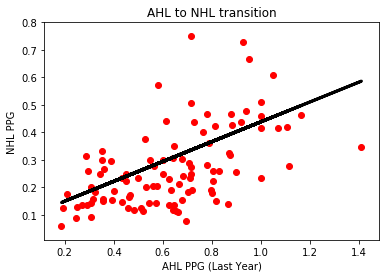

In [106]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

def getFloat(str):
    if not str:
        return 0
    else:
        return float(str)

def loadcsv(str):
    data = [];
    data2 = [];

    ahl_data = [];
    chl_data = [];
    ncaa_data = [];
    khl_data = [];
    europe_data = [];

    with open('condensed16-17.csv', 'r') as csvfile:
        data = list(csv.reader(csvfile))
        for row in data[2:]:
            if row[3] == 'AHL' and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                ahl_data += [[getFloat(row[2]), row[3], getFloat(row[4])]]

            elif row[3] == "OHL" or row[3] == "WHL" or row[3] == "QMJHL" and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                chl_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]

            elif row[3] == "NCAA" and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                ncaa_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]

            elif row[3] == "KHL" and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                khl_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]

            elif getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                europe_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]
                
            else:
                continue

    ahl_ly_ppg = np.array([[item[2] for item in ahl_data]])
    ahl_ppg = np.array([[item[0] for item in ahl_data]])
    
    ahl_ly_ppg = ahl_ly_ppg.reshape(236, 1)
    ahl_ppg = ahl_ppg.reshape(236, 1)

    ahl_ly_ppg_x_train = ahl_ly_ppg[:-100]
    ahl_ly_ppg_x_test = ahl_ly_ppg[-100:]
    
    ahl_ppg_y_train = ahl_ppg[:-100]
    ahl_ppg_y_test = ahl_ppg[-100:]
    
    # Linear regression object
    linreg = linear_model.LinearRegression()
    
    # Trains the model using the training sets
    linreg.fit(ahl_ly_ppg_x_train, ahl_ppg_y_train)
    
    # Make prediction using the testing set
    ahl_ppg_y_predict = linreg.predict(ahl_ly_ppg_x_test)

    print ("Variance Score: %.2f" %r2_score(ahl_ppg_y_test, ahl_ppg_y_predict))
    print ("Residual Sum of Squares: %.2f" % mean_squared_error(ahl_ppg_y_test, ahl_ppg_y_predict))

    plt.scatter(ahl_ly_ppg_x_test, ahl_ppg_y_test, color = 'red')
    plt.plot(ahl_ly_ppg_x_test, ahl_ppg_y_predict, color = 'black', linewidth = 3)
    
    plt.title('AHL to NHL transition')
    plt.xlabel('AHL PPG (Last Year)')
    plt.ylabel('NHL PPG')
           
    plt.show()

loadcsv('condensed16-17.csv')

Variance Score: 0.11
Residual Sum of Squares: 0.02


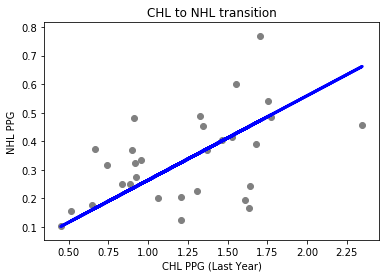

In [107]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

def getFloat(str):
    if not str:
        return 0
    else:
        return float(str)

def loadcsv(str):
    data = [];
    data2 = [];

    ahl_data = [];
    chl_data = [];
    ncaa_data = [];
    khl_data = [];
    europe_data = [];

    with open('condensed16-17.csv', 'r') as csvfile:
        data = list(csv.reader(csvfile))
        for row in data[2:]:
            if row[3] == 'AHL' and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                ahl_data += [[getFloat(row[2]), row[3], getFloat(row[4])]]

            elif row[3] == "OHL" or row[3] == "WHL" or row[3] == "QMJHL" and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                chl_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]

            elif row[3] == "NCAA" and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                ncaa_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]

            elif row[3] == "KHL" and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                khl_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]

            elif getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                europe_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]
                
            else:
                continue

    chl_ly_ppg = np.array([[item[2] for item in chl_data]])
    chl_ppg = np.array([[item[0] for item in chl_data]])

    chl_ly_ppg = chl_ly_ppg.reshape(61, 1)
    chl_ppg = chl_ppg.reshape(61, 1)

    chl_ly_ppg_x_train = chl_ly_ppg[:-30]
    chl_ly_ppg_x_test = chl_ly_ppg[-30:]
    
    chl_ppg_y_train = chl_ppg[:-30]
    chl_ppg_y_test = chl_ppg[-30:]
    
    # Linear regression object
    linreg = linear_model.LinearRegression()
    
    # Trains the model using the training sets
    linreg.fit(chl_ly_ppg_x_train, chl_ppg_y_train)
    
    # Make prediction using the testing set
    chl_ppg_y_predict = linreg.predict(chl_ly_ppg_x_test)

    print ("Variance Score: %.2f" %r2_score(chl_ppg_y_test, chl_ppg_y_predict)) 
    print ("Residual Sum of Squares: %.2f" % mean_squared_error(chl_ppg_y_test, chl_ppg_y_predict))

    plt.scatter(chl_ly_ppg_x_test, chl_ppg_y_test, color = 'gray')
    plt.plot(chl_ly_ppg_x_test, chl_ppg_y_predict, color = 'blue', linewidth = 3)
    
    plt.title('CHL to NHL transition')
    plt.xlabel('CHL PPG (Last Year)')
    plt.ylabel('NHL PPG')
           
    plt.show()

loadcsv('condensed16-17.csv')

Variance Score: 0.16
Residual Sum of Squares: 0.03


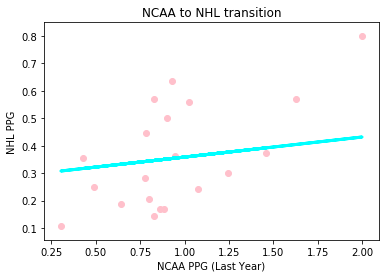

In [108]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

def getFloat(str):
    if not str:
        return 0
    else:
        return float(str)

def loadcsv(str):
    data = [];
    data2 = [];

    ahl_data = [];
    chl_data = [];
    ncaa_data = [];
    khl_data = [];
    europe_data = [];

    with open('condensed16-17.csv', 'r') as csvfile:
        data = list(csv.reader(csvfile))
        for row in data[2:]:
            if row[3] == 'AHL' and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                ahl_data += [[getFloat(row[2]), row[3], getFloat(row[4])]]

            elif row[3] == "OHL" or row[3] == "WHL" or row[3] == "QMJHL" and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                chl_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]

            elif row[3] == "NCAA" and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                ncaa_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]

            elif row[3] == "KHL" and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                khl_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]

            elif getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                europe_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]
                
            else:
                continue

    ncaa_ly_ppg = np.array([[item[2] for item in ncaa_data]])
    ncaa_ppg = np.array([[item[0] for item in ncaa_data]])

    ncaa_ly_ppg = ncaa_ly_ppg.reshape(43, 1)
    ncaa_ppg = ncaa_ppg.reshape(43, 1)

    ncaa_ly_ppg_x_train = ncaa_ly_ppg[:-20]
    ncaa_ly_ppg_x_test = ncaa_ly_ppg[-20:]
    
    ncaa_ppg_y_train = ncaa_ppg[:-20]
    ncaa_ppg_y_test = ncaa_ppg[-20:]
    
    # Linear regression object
    linreg = linear_model.LinearRegression()
    
    # Trains the model using the training sets
    linreg.fit(ncaa_ly_ppg_x_train, ncaa_ppg_y_train)
    
    # Make prediction using the testing set
    ncaa_ppg_y_predict = linreg.predict(ncaa_ly_ppg_x_test)

    print ("Variance Score: %.2f" %r2_score(ncaa_ppg_y_test, ncaa_ppg_y_predict)) 
    print ("Residual Sum of Squares: %.2f" % mean_squared_error(ncaa_ppg_y_test, ncaa_ppg_y_predict))

    plt.scatter(ncaa_ly_ppg_x_test, ncaa_ppg_y_test, color = 'pink')
    plt.plot(ncaa_ly_ppg_x_test, ncaa_ppg_y_predict, color = 'cyan', linewidth = 3)
    
    plt.title('NCAA to NHL transition')
    plt.xlabel('NCAA PPG (Last Year)')
    plt.ylabel('NHL PPG')
           
    plt.show()

loadcsv('condensed16-17.csv')

Variance Score: 0.51
Residual Sum of Squares: 0.01


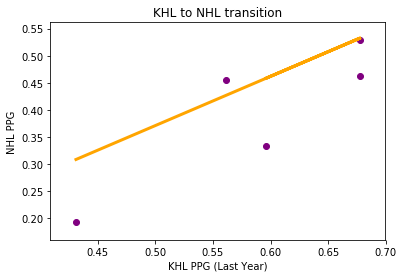

In [109]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

def getFloat(str):
    if not str:
        return 0
    else:
        return float(str)

def loadcsv(str):
    data = [];
    data2 = [];

    ahl_data = [];
    chl_data = [];
    ncaa_data = [];
    khl_data = [];
    europe_data = [];

    with open('condensed16-17.csv', 'r') as csvfile:
        data = list(csv.reader(csvfile))
        for row in data[2:]:
            if row[3] == 'AHL' and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                ahl_data += [[getFloat(row[2]), row[3], getFloat(row[4])]]

            elif row[3] == "OHL" or row[3] == "WHL" or row[3] == "QMJHL" and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                chl_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]

            elif row[3] == "NCAA" and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                ncaa_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]

            elif row[3] == "KHL" and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                khl_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]

            elif getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                europe_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]
                
            else:
                continue

    khl_ly_ppg = np.array([[item[2] for item in khl_data]])
    khl_ppg = np.array([[item[0] for item in khl_data]])

    khl_ly_ppg = khl_ly_ppg.reshape(10, 1)
    khl_ppg = khl_ppg.reshape(10, 1)

    khl_ly_ppg_x_train = khl_ly_ppg[:-5]
    khl_ly_ppg_x_test = khl_ly_ppg[-5:]
    
    khl_ppg_y_train = khl_ppg[:-5]
    khl_ppg_y_test = khl_ppg[-5:]
    
    # Linear regression object
    linreg = linear_model.LinearRegression()
    
    # Trains the model using the training sets
    linreg.fit(khl_ly_ppg_x_train, khl_ppg_y_train)
    
    # Make prediction using the testing set
    khl_ppg_y_predict = linreg.predict(khl_ly_ppg_x_test)

    print ("Variance Score: %.2f" %r2_score(khl_ppg_y_test, khl_ppg_y_predict)) 
    print ("Residual Sum of Squares: %.2f" % mean_squared_error(khl_ppg_y_test, khl_ppg_y_predict))

    plt.scatter(khl_ly_ppg_x_test, khl_ppg_y_test, color = 'purple')
    plt.plot(khl_ly_ppg_x_test, khl_ppg_y_predict, color = 'orange', linewidth = 3)
    
    plt.title('KHL to NHL transition')
    plt.xlabel('KHL PPG (Last Year)')
    plt.ylabel('NHL PPG')
           
    plt.show()

loadcsv('condensed16-17.csv')

Variance Score: 0.35
Residual Sum of Squares: 0.01


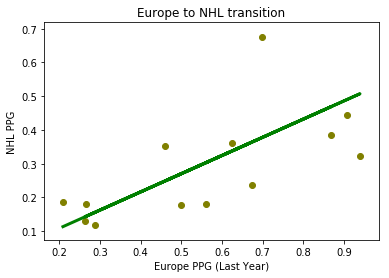

In [101]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

def getFloat(str):
    if not str:
        return 0
    else:
        return float(str)

def loadcsv(str):
    data = [];
    data2 = [];

    ahl_data = [];
    chl_data = [];
    ncaa_data = [];
    khl_data = [];
    europe_data = [];

    with open('condensed16-17.csv', 'r') as csvfile:
        data = list(csv.reader(csvfile))
        for row in data[2:]:
            if row[3] == 'AHL' and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                ahl_data += [[getFloat(row[2]), row[3], getFloat(row[4])]]

            elif row[3] == "OHL" or row[3] == "WHL" or row[3] == "QMJHL" and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                chl_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]

            elif row[3] == "NCAA" and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                ncaa_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]

            elif row[3] == "KHL" and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                khl_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]

            elif getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                europe_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]
                
            else:
                continue

    europe_ly_ppg = np.array([[item[2] for item in europe_data]])
    europe_ppg = np.array([[item[0] for item in europe_data]])
    
    europe_ly_ppg = europe_ly_ppg.reshape(31, 1)
    europe_ppg = europe_ppg.reshape(31, 1)

    europe_ly_ppg_x_train = europe_ly_ppg[:-13]
    europe_ly_ppg_x_test = europe_ly_ppg[-13:]
    
    europe_ppg_y_train = europe_ppg[:-13]
    europe_ppg_y_test = europe_ppg[-13:]
    
    # Linear regression object
    linreg = linear_model.LinearRegression()
    
    # Trains the model using the training sets
    linreg.fit(europe_ly_ppg_x_train, europe_ppg_y_train)
    
    # Make prediction using the testing set
    europe_ppg_y_predict = linreg.predict(europe_ly_ppg_x_test)

    print ("Variance Score: %.2f" %r2_score(europe_ppg_y_test, europe_ppg_y_predict))  
    print ("Residual Sum of Squares: %.2f" % mean_squared_error(europe_ppg_y_test, europe_ppg_y_predict))
    
    # The line is the best fit line that will minimize the sum of squares of the data points
    plt.scatter(europe_ly_ppg_x_test, europe_ppg_y_test, color = 'olive')
    plt.plot(europe_ly_ppg_x_test, europe_ppg_y_predict, color = 'green', linewidth = 3)
    
    plt.title('Europe to NHL transition')
    plt.xlabel('Europe PPG (Last Year)')
    plt.ylabel('NHL PPG')
           
    plt.show()

loadcsv('condensed16-17.csv')

AHL Variance Score: -0.45
AHL Residual Sum of Squares: 0.03 

CHL Variance Score: -8.36
CHL Residual Sum of Squares: 0.22 

NCAA Variance Score: -1.14
NCAA Residual Sum of Squares: 0.07 

KHL Variance Score: 0.39
KHL Residual Sum of Squares: 0.01 

Europe Variance Score: -0.12
Europe Residual Sum of Squares: 0.02


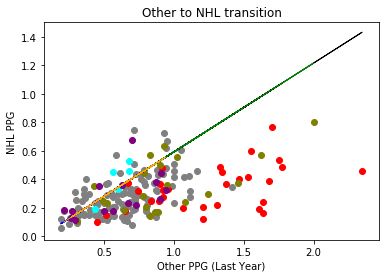

In [98]:

import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

def getFloat(str):
    if not str:
        return 0
    else:
        return float(str)

def loadcsv(str):
    data = [];
    data2 = [];

    ahl_data = [];
    chl_data = [];
    ncaa_data = [];
    khl_data = [];
    europe_data = [];

    with open('condensed16-17.csv', 'r') as csvfile:
        data = list(csv.reader(csvfile))
        for row in data[2:]:
            if row[3] == 'AHL' and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                ahl_data += [[getFloat(row[2]), row[3], getFloat(row[4])]]

            elif row[3] == "OHL" or row[3] == "WHL" or row[3] == "QMJHL" and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                chl_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]

            elif row[3] == "NCAA" and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                ncaa_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]

            elif row[3] == "KHL" and getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                khl_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]

            elif getFloat(row[2]) / getFloat(row[4]) <= 1.1:
                europe_data += [[getFloat(row[2]), row[3],  getFloat(row[4])]]
                
            else:
                continue

    ahl_ly_ppg = np.array([[item[2] for item in ahl_data]])
    chl_ly_ppg = np.array([[item[2] for item in chl_data]])
    ncaa_ly_ppg = np.array([[item[2] for item in ncaa_data]])
    khl_ly_ppg = np.array([[item[2] for item in khl_data]])
    europe_ly_ppg = np.array([[item[2] for item in europe_data]])
    
    ahl_ppg = np.array([[item[0] for item in ahl_data]])
    chl_ppg = np.array([[item[0] for item in chl_data]])
    ncaa_ppg = np.array([[item[0] for item in ncaa_data]])
    khl_ppg = np.array([[item[0] for item in khl_data]])
    europe_ppg = np.array([[item[0] for item in europe_data]])
    
    ahl_ly_ppg = ahl_ly_ppg.reshape(236, 1)
    chl_ly_ppg = chl_ly_ppg.reshape(61, 1)
    ncaa_ly_ppg = ncaa_ly_ppg.reshape(43, 1)
    khl_ly_ppg = khl_ly_ppg.reshape(10, 1)
    europe_ly_ppg = europe_ly_ppg.reshape(31, 1)
    
    ahl_ppg = ahl_ppg.reshape(236, 1)
    chl_ppg = chl_ppg.reshape(61, 1)
    ncaa_ppg = ncaa_ppg.reshape(43, 1)
    khl_ppg = khl_ppg.reshape(10, 1)
    europe_ppg = europe_ppg.reshape(31, 1)

    ahl_ly_ppg_x_train = ahl_ly_ppg[:-118]
    ahl_ly_ppg_x_test = ahl_ly_ppg[-118:]
    chl_ly_ppg_x_train = chl_ly_ppg[:-30]
    chl_ly_ppg_x_test = chl_ly_ppg[-30:]
    ncaa_ly_ppg_x_train = ncaa_ly_ppg[:-21]
    ncaa_ly_ppg_x_test = ncaa_ly_ppg[-21:]
    khl_ly_ppg_x_train = khl_ly_ppg[:-5]
    khl_ly_ppg_x_test = khl_ly_ppg[-5:]
    europe_ly_ppg_x_train = europe_ly_ppg[:-15]
    europe_ly_ppg_x_test = europe_ly_ppg[-15:]
    
    ahl_ppg_y_train = ahl_ppg[:-118]
    ahl_ppg_y_test = ahl_ppg[-118:]
    chl_ppg_y_train = chl_ppg[:-30]
    chl_ppg_y_test = chl_ppg[-30:]
    khl_ppg_y_train = khl_ppg[:-5]
    khl_ppg_y_test = khl_ppg[-5:]
    ncaa_ppg_y_train = ncaa_ppg[:-21]
    ncaa_ppg_y_test = ncaa_ppg[-21:]
    europe_ppg_y_train = europe_ppg[:-15]
    europe_ppg_y_test = europe_ppg[-15:]
    
    # Linear regression object
    linreg = linear_model.LinearRegression()
    
    # Trains the model using the training sets
    linreg.fit(ahl_ly_ppg_x_train, ahl_ppg_y_train)
    linreg.fit(chl_ly_ppg_x_train, chl_ppg_y_train)
    linreg.fit(khl_ly_ppg_x_train, khl_ppg_y_train)
    linreg.fit(ncaa_ly_ppg_x_train, ncaa_ppg_y_train)
    linreg.fit(europe_ly_ppg_x_train, europe_ppg_y_train)
    
    # Make prediction using the testing set
    ahl_ppg_y_predict = linreg.predict(ahl_ly_ppg_x_test)
    chl_ppg_y_predict = linreg.predict(chl_ly_ppg_x_test)
    ncaa_ppg_y_predict = linreg.predict(ncaa_ly_ppg_x_test)
    khl_ppg_y_predict = linreg.predict(khl_ly_ppg_x_test)
    europe_ppg_y_predict = linreg.predict(europe_ly_ppg_x_test)

    print ("AHL Variance Score: %.2f" %r2_score(ahl_ppg_y_test, ahl_ppg_y_predict))
    print ("AHL Residual Sum of Squares: %.2f" % mean_squared_error(ahl_ppg_y_test, ahl_ppg_y_predict),'\n')
    print ("CHL Variance Score: %.2f" %r2_score(chl_ppg_y_test, chl_ppg_y_predict)) 
    print ("CHL Residual Sum of Squares: %.2f" % mean_squared_error(chl_ppg_y_test, chl_ppg_y_predict),'\n')
    print ("NCAA Variance Score: %.2f" %r2_score(ncaa_ppg_y_test, ncaa_ppg_y_predict)) 
    print ("NCAA Residual Sum of Squares: %.2f" % mean_squared_error(ncaa_ppg_y_test, ncaa_ppg_y_predict),'\n')
    print ("KHL Variance Score: %.2f" %r2_score(khl_ppg_y_test, khl_ppg_y_predict))
    print ("KHL Residual Sum of Squares: %.2f" % mean_squared_error(khl_ppg_y_test, khl_ppg_y_predict),'\n')
    print ("Europe Variance Score: %.2f" %r2_score(europe_ppg_y_test, europe_ppg_y_predict))
    print ("Europe Residual Sum of Squares: %.2f" % mean_squared_error(europe_ppg_y_test, europe_ppg_y_predict))

    plt.scatter(ahl_ly_ppg_x_test, ahl_ppg_y_test, color = 'gray')
    plt.plot(ahl_ly_ppg_x_test, ahl_ppg_y_predict, color = 'blue', linewidth = 1)
    plt.scatter(chl_ly_ppg_x_test, chl_ppg_y_test, color = 'red')
    plt.plot(chl_ly_ppg_x_test, chl_ppg_y_predict, color = 'black', linewidth = 1)
    plt.scatter(ncaa_ly_ppg_x_test, ncaa_ppg_y_test, color = 'olive')
    plt.plot(ncaa_ly_ppg_x_test, ncaa_ppg_y_predict, color = 'green', linewidth = 1)
    plt.scatter(khl_ly_ppg_x_test, khl_ppg_y_test, color = 'cyan')
    plt.plot(khl_ly_ppg_x_test, khl_ppg_y_predict, color = 'pink', linewidth = 1)
    plt.scatter(europe_ly_ppg_x_test, europe_ppg_y_test, color = 'purple')
    plt.plot(europe_ly_ppg_x_test, europe_ppg_y_predict, color = 'orange', linewidth = 1)
    
    plt.title('Other to NHL transition')
    plt.xlabel('Other PPG (Last Year)')
    plt.ylabel('NHL PPG')
           
    plt.show()

loadcsv('condensed16-17.csv')
